In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet

In [201]:
df = pd.read_csv("zipcodes.csv")

In [202]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,111866.741314,...,273222.413831,277033.628170,279962.717673,281496.578812,281690.364813,281092.699344,280107.886185,278548.848440,276753.497813,275214.554308
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,220534.092937,...,473548.073978,479717.179175,483459.280358,484186.390092,482706.577301,481032.678096,479634.201740,477666.007240,475470.186757,474347.550074
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,92655.349036,...,181360.819505,183535.390170,185482.635258,187018.192868,188056.300032,188798.110684,189557.624171,190082.494270,191041.111960,192184.530382
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,72948.673936,...,325553.208878,326102.856651,326366.813599,325633.363288,323904.899569,322045.051381,321395.145617,320127.893337,320087.471953,320670.135773
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,234929.452170,...,741858.194383,749606.647715,754899.586478,756155.905939,753092.879612,750451.458241,748582.920489,745102.938136,741891.991122,737817.616928


In [203]:
#California values only
df = df[df['State']=='CA']

df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
5,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,119839.313967,...,560633.016157,563321.930308,568092.295814,571707.404825,574981.934815,575326.929828,575938.919195,574879.431298,571582.652888,564069.059678
8,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,134389.110558,...,674333.494293,678887.131776,681609.591418,682542.465358,682706.364804,682890.103433,682731.716544,680283.412098,671074.935316,658524.211702
9,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,170070.482227,...,676780.103466,680264.100366,681707.693078,681644.444904,680719.205554,679113.240449,677447.329296,674955.086949,668571.308399,659810.343165
12,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,143697.125986,...,601923.520268,605839.585154,609695.010745,611891.191220,612492.600989,612269.889931,612414.063141,611624.894565,610507.329978,606394.722905
13,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,107687.382516,...,504226.146742,510075.224338,512719.454559,512751.351913,511969.885417,512680.314653,514173.314907,514986.382121,511939.482417,506777.046082


In [204]:
df.drop(columns=['RegionType', 'StateName'])

,RegionID,SizeRank,RegionName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
5,95992,5,90011,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,119839.313967,120297.532017,120991.315184,...,560633.016157,563321.930308,568092.295814,571707.404825,574981.934815,575326.929828,575938.919195,574879.431298,571582.652888,564069.059678
8,96361,8,91331,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,134389.110558,134571.656995,135164.994106,...,674333.494293,678887.131776,681609.591418,682542.465358,682706.364804,682890.103433,682731.716544,680283.412098,671074.935316,658524.211702
9,96193,9,90650,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,170070.482227,170211.890213,170741.790827,...,676780.103466,680264.100366,681707.693078,681644.444904,680719.205554,679113.240449,677447.329296,674955.086949,668571.308399,659810.343165
12,96083,12,90201,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,143697.125986,143753.194292,144158.601704,...,601923.520268,605839.585154,609695.010745,611891.191220,612492.600989,612269.889931,612414.063141,611624.894565,610507.329978,606394.722905
13,96816,13,92335,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,107687.382516,108462.407960,109042.577166,...,504226.146742,510075.224338,512719.454559,512751.351913,511969.885417,512680.314653,514173.314907,514986.382121,511939.482417,506777.046082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26895,97486,30657,93932,CA,Lockwood,"Salinas, CA",Monterey County,NaN,NaN,NaN,...,824919.738309,827836.067492,822169.735696,812189.508046,796369.177365,782865.516688,769555.071487,756943.094967,741649.068931,734515.614410
26935,98388,30657,95697,CA,Woodland,"Sacramento-Roseville-Folsom, CA",Yolo County,NaN,NaN,NaN,...,443795.764744,448103.700375,450591.131714,451088.090106,449186.638296,446913.957628,442671.278647,438424.155963,433525.971575,427801.570629
26950,98399,30657,95720,CA,Twin Bridges,"Sacramento-Roseville-Folsom, CA",El Dorado County,NaN,NaN,NaN,...,395666.588373,398178.280266,398728.388265,398054.781962,395991.076728,393514.287968,390937.216526,387411.611163,384791.206831,381710.241230
26957,98063,30657,95233,CA,Murphys,NaN,Calaveras County,NaN,NaN,NaN,...,393778.758798,396079.850744,396666.482086,395965.938076,393932.311274,391848.486034,388638.654400,384948.537653,381524.880084,381183.543119


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 5 to 26966
Columns: 287 entries, RegionID to 2023-02-28
dtypes: float64(278), int64(3), object(6)
memory usage: 3.4+ MB


In [233]:
df.value_counts()

RegionID  SizeRank  RegionName  RegionType  StateName  State  City                 Metro                                 CountyName             2000-01-31     2000-02-29     2000-03-31     2000-04-30     2000-05-31     2000-06-30     2000-07-31     2000-08-31     2000-09-30     2000-10-31     2000-11-30     2000-12-31     2001-01-31     2001-02-28     2001-03-31     2001-04-30     2001-05-31     2001-06-30     2001-07-31     2001-08-31     2001-09-30     2001-10-31     2001-11-30     2001-12-31     2002-01-31     2002-02-28     2002-03-31     2002-04-30     2002-05-31     2002-06-30     2002-07-31     2002-08-31     2002-09-30     2002-10-31     2002-11-30     2002-12-31     2003-01-31     2003-02-28     2003-03-31     2003-04-30     2003-05-31     2003-06-30     2003-07-31     2003-08-31     2003-09-30     2003-10-31     2003-11-30     2003-12-31     2004-01-31     2004-02-29     2004-03-31     2004-04-30     2004-05-31     2004-06-30     2004-07-31     2004-08-31     2004-09-30     2

In [207]:
def one_zipcode(df, index):
    """This function pulls the data for one zipcode at a time and retuns a DataFrame for using in Prophet."""
    series = df.iloc[index]
    series_data = series.iloc[9:]
    df_series = pd.DataFrame(series_data.values, index = series_data.index, columns = ['y'])
    df_series.index = pd.to_datetime(df_series.index, yearfirst = True, format = '%Y-%m')
    df_series['ds'] = df_series.index
    df_series.reset_index(drop = True, inplace = True)
    df_series['y'] = df_series['y'].astype('int64')
    return df_series

In [255]:
one_zipcode(df, 50)

,y,ds
0,96868,2000-01-31
1,96765,2000-02-29
2,97080,2000-03-31
3,97643,2000-04-30
4,98547,2000-05-31
...,...,...
273,413182,2022-10-31
274,411285,2022-11-30
275,408776,2022-12-31
276,405003,2023-01-31


In [256]:
#Need helper function for zipcode
def get_zipcode(df, index):
    """This function extracts the zipcode from the dataframe at the index. Useful in constructing data dictionanry
    later."""
    zipcode = df['RegionName'].iloc[index]
    return zipcode

In [257]:
get_zipcode(df, 50)

93535

In [258]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [259]:
ex_ts = one_zipcode(df, 50)

In [260]:
get_zipcode(df, 50)

93535

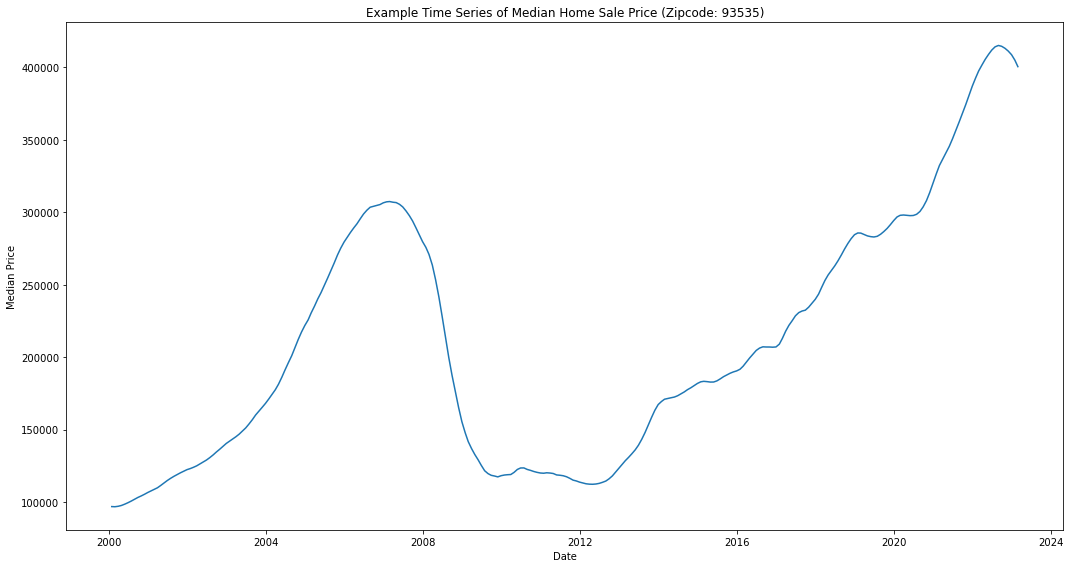

In [261]:
fig = plt.figure(figsize = (15, 8))
plt.plot(ex_ts['ds'], ex_ts['y'])
plt.title(f"Example Time Series of Median Home Sale Price (Zipcode: {get_zipcode(df, 50)})")
plt.xlabel("Date")
plt.ylabel("Median Price")
plt.tight_layout()
plt.savefig("Example_time_series.png", dpi = 200);

In [262]:
series = df.iloc[50]

In [263]:
series_data = series.iloc[9:]

In [264]:
df_series = pd.DataFrame(series_data.values, index = series_data.index, columns = ['y'])

In [265]:
df_series.index = pd.to_datetime(df_series.index, yearfirst = True, format = '%Y-%m')

In [266]:
df_series['ds'] = df_series.index

In [267]:
df_series.reset_index(drop = True, inplace = True)

In [268]:
df_series['y'] = df_series['y'].astype('int64')

In [269]:
df_series.y.dtype

dtype('int64')

In [270]:
def Prophet_analysis(df):
    """This function instantiates a Prophet model, fits it to the DataFrame, and predicts values which are returned in 
    a forecast Dataframe."""
    m = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
    m.fit(df)
    future = m.make_future_dataframe(60, freq = 'M')
    forecast = m.predict(future)
    return forecast

In [271]:
Prophet_analysis(one_zipcode(df, 23))

15:18:35 - cmdstanpy - INFO - Chain [1] start processing
15:18:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2000-01-31,99360.707560,76497.086399,121045.588838,99360.707560,99360.707560,-0.008206,-0.008206,-0.008206,-0.008206,-0.008206,-0.008206,0.0,0.0,0.0,98545.381416
1,2000-02-29,100838.346908,75029.448043,122973.508762,100838.346908,100838.346908,-0.001252,-0.001252,-0.001252,-0.001252,-0.001252,-0.001252,0.0,0.0,0.0,100712.054657
2,2000-03-31,102417.892419,79019.385084,128489.496112,102417.892419,102417.892419,0.006771,0.006771,0.006771,0.006771,0.006771,0.006771,0.0,0.0,0.0,103111.384969
3,2000-04-30,103946.484848,81448.060961,127263.270292,103946.484848,103946.484848,0.006009,0.006009,0.006009,0.006009,0.006009,0.006009,0.0,0.0,0.0,104571.136414
4,2000-05-31,105526.030359,82760.653776,132117.035726,105526.030359,105526.030359,0.014846,0.014846,0.014846,0.014846,0.014846,0.014846,0.0,0.0,0.0,107092.660975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2027-10-31,680755.306468,487847.598199,917400.783795,485556.220731,910171.636727,0.004567,0.004567,0.004567,0.004567,0.004567,0.004567,0.0,0.0,0.0,683864.235402
334,2027-11-30,683898.739580,491635.579763,927509.804783,482834.821484,919453.250135,0.014091,0.014091,0.014091,0.014091,0.014091,0.014091,0.0,0.0,0.0,693535.584903
335,2027-12-31,687146.953795,484186.463218,940208.147813,480944.780648,928878.655440,0.007562,0.007562,0.007562,0.007562,0.007562,0.007562,0.0,0.0,0.0,692343.227104
336,2028-01-31,690395.168011,481630.188799,925824.479587,479514.940823,936508.071551,-0.008206,-0.008206,-0.008206,-0.008206,-0.008206,-0.008206,0.0,0.0,0.0,684729.978579


In [272]:
m = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
m.fit(df_series)

15:18:37 - cmdstanpy - INFO - Chain [1] start processing
15:18:37 - cmdstanpy - INFO - Chain [1] done processing


In [273]:
future = m.make_future_dataframe(60, freq='M')
future.tail()

,ds
333,2027-10-31
334,2027-11-30
335,2027-12-31
336,2028-01-31
337,2028-02-29


In [274]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
333,2027-10-31,570870.443917,374665.563639,746834.374032
334,2027-11-30,577960.870991,385271.901089,762405.849171
335,2027-12-31,576990.898419,375707.191648,767353.191531
336,2028-01-31,572604.021130,366625.879841,757339.045490
337,2028-02-29,579674.462877,367262.282137,764711.312590


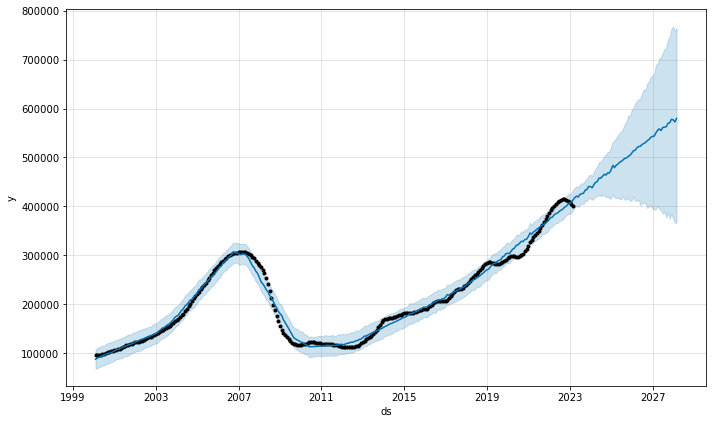

In [275]:
fig1 = m.plot(forecast)

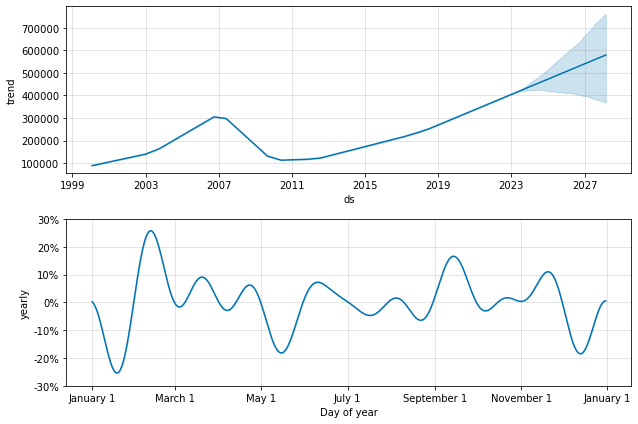

In [276]:
fig2 = m.plot_components(forecast)